# Diamond Price Prediction

### Import Libraries and load Dataset

In [9]:
#All the libralies related to the project

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

In [10]:
#Reads the dataset and assigns it to diamonds_ds

diamonds_ds = pd.read_csv("diamonds.csv")
diamonds_ds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Data Visualization

In [11]:
#View the column lables

diamonds_ds.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

In [12]:
#View the numbers of columns and rows in the dataframe

diamonds_ds.shape

(53940, 11)

Text(0.5, 1.0, 'Distribution of Diamond Price')

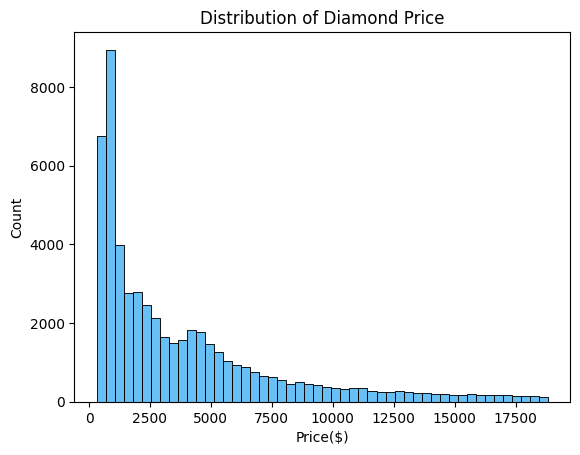

In [42]:
# Plotting a actual price distribution.

sns.histplot(diamonds_ds['price'], color='#34AAF0', bins=50)
plt.xlabel('Price($)')
plt.ylabel('Count')
plt.title('Distribution of Diamond Price')

## Data Preprocessing

In [15]:
#view a summary of the DataFrame

diamonds_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [16]:
#check correlation coefficients between the 'price' column and all other columns

diamonds_ds.corr()['price']

<ipython-input-16-75f86861410a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds_ds.corr()['price']


Unnamed: 0   -0.306873
carat         0.921591
depth        -0.010647
table         0.127134
price         1.000000
x             0.884435
y             0.865421
z             0.861249
Name: price, dtype: float64

In [17]:
#Remove The first from dataset because column is index

diamonds_ds = diamonds_ds.drop(["Unnamed: 0"], axis=1)
diamonds_ds.head(4)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


In [18]:
#check for null values

diamonds_ds.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [19]:
#check for duplicate values

duplicates = diamonds_ds.duplicated()
print(duplicates.sum())

146


In [20]:
#drop duplicate values

diamonds_ds.drop_duplicates(inplace=True)

In [21]:
#display number of duplicate values

duplicates = diamonds_ds.duplicated()
print(duplicates.sum())

0


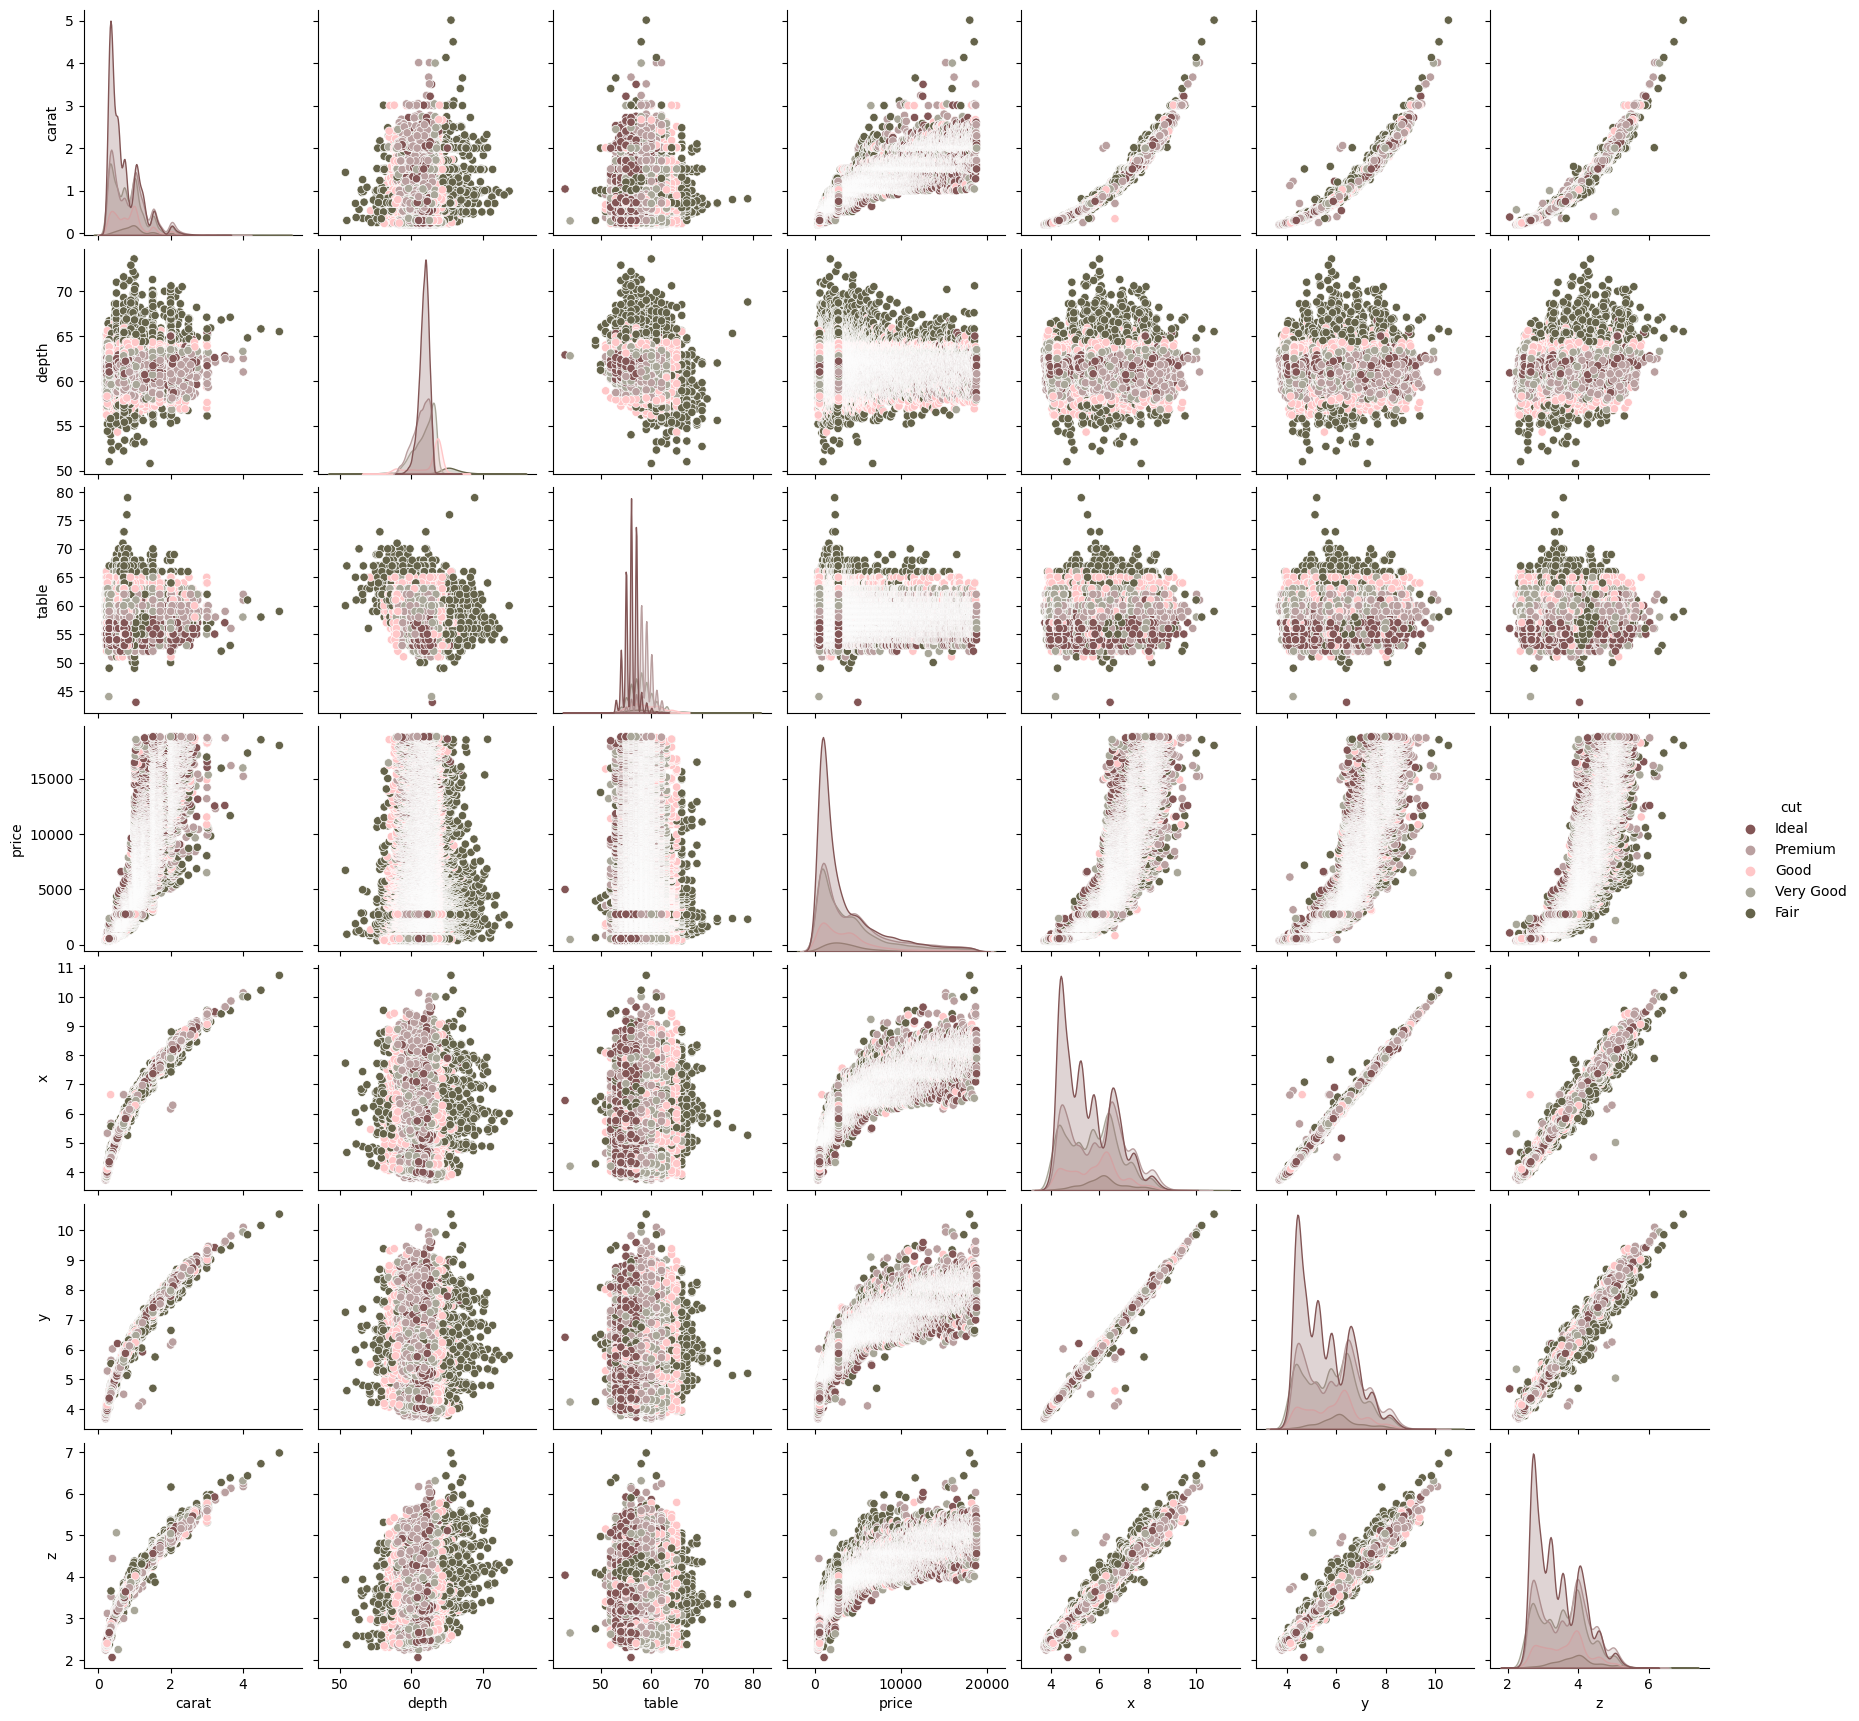

In [ ]:
#view the data distribution
shade = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a"]#different shades for hue
ax = sns.pairplot(diamonds_ds, hue= "cut",palette=shade)#chose "cut" as hue.

In [22]:
#Dropping the outliers.

diamonds_ds = diamonds_ds[(diamonds_ds["depth"]<75)&(diamonds_ds["depth"]>45)]
diamonds_ds = diamonds_ds[(diamonds_ds["table"]<80)&(diamonds_ds["table"]>40)]
diamonds_ds = diamonds_ds[(diamonds_ds["x"]<30)]
diamonds_ds = diamonds_ds[(diamonds_ds["y"]<30)]
diamonds_ds = diamonds_ds[(diamonds_ds["z"]<30)&(diamonds_ds["z"]>2)]
diamonds_ds.shape

(53763, 10)

In [23]:
# Get list of categorical variables

s = (diamonds_ds.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


Text(0.5, 0, 'Cut')

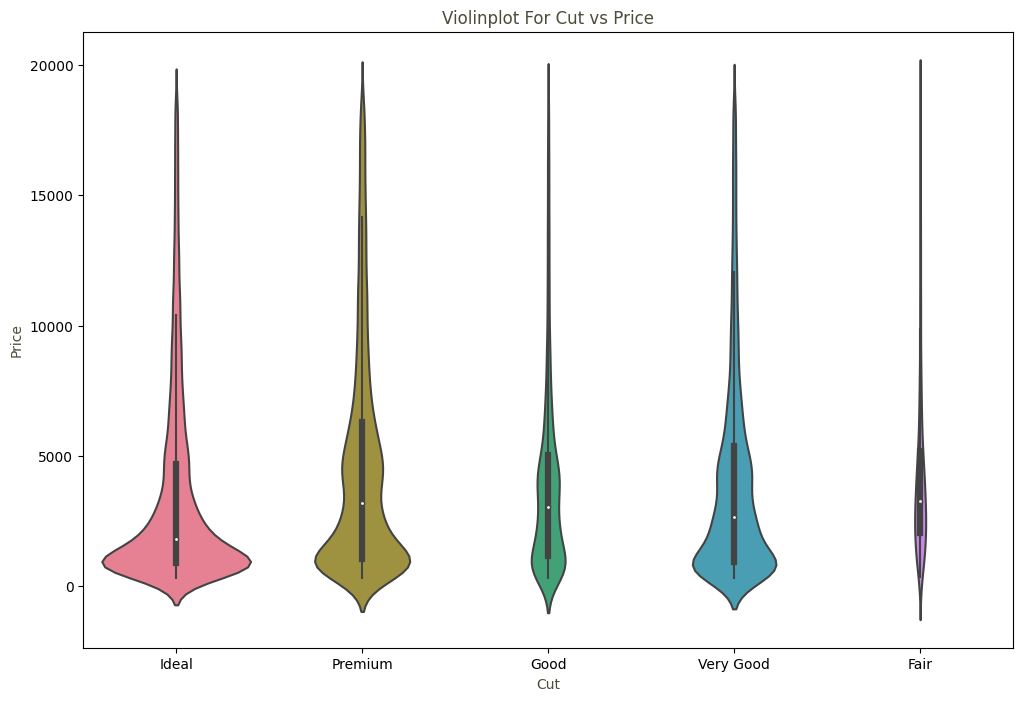

In [24]:
# Define a color palette

shade = sns.color_palette("husl", 5)

plt.figure(figsize=(12,8))
ax = sns.violinplot(x="cut",y="price", data=diamonds_ds, palette=shade,scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

In [25]:
# Make copy to avoid changing original data 
lb_diamonds = diamonds_ds.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    lb_diamonds[col] = label_encoder.fit_transform(lb_diamonds[col])
lb_diamonds.head(20)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,4,6,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,4,5,6,62.3,57.0,336,3.95,3.98,2.47
7,0.26,4,4,2,61.9,55.0,337,4.07,4.11,2.53
8,0.22,0,1,5,65.1,61.0,337,3.87,3.78,2.49
9,0.23,4,4,4,59.4,61.0,338,4.00,4.05,2.39


In [26]:
#display first five rows
lb_diamonds.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [27]:
#display description of dataset
lb_diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000,53763.000000
mean,0.797460,2.554247,2.593698,3.836188,61.748781,57.457207,3930.785336,5.731405,5.733299,3.539367
std,0.473136,1.027364,1.701283,1.724832,1.419309,2.226311,3985.807738,1.118563,1.110473,0.690879
min,0.200000,0.000000,0.000000,0.000000,50.800000,43.000000,326.000000,3.730000,3.680000,2.060000
25%,0.400000,2.000000,1.000000,2.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2.000000,3.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,3.000000,4.000000,5.000000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,4.000000,6.000000,7.000000,73.600000,79.000000,18823.000000,10.740000,10.540000,6.980000


<Axes: >

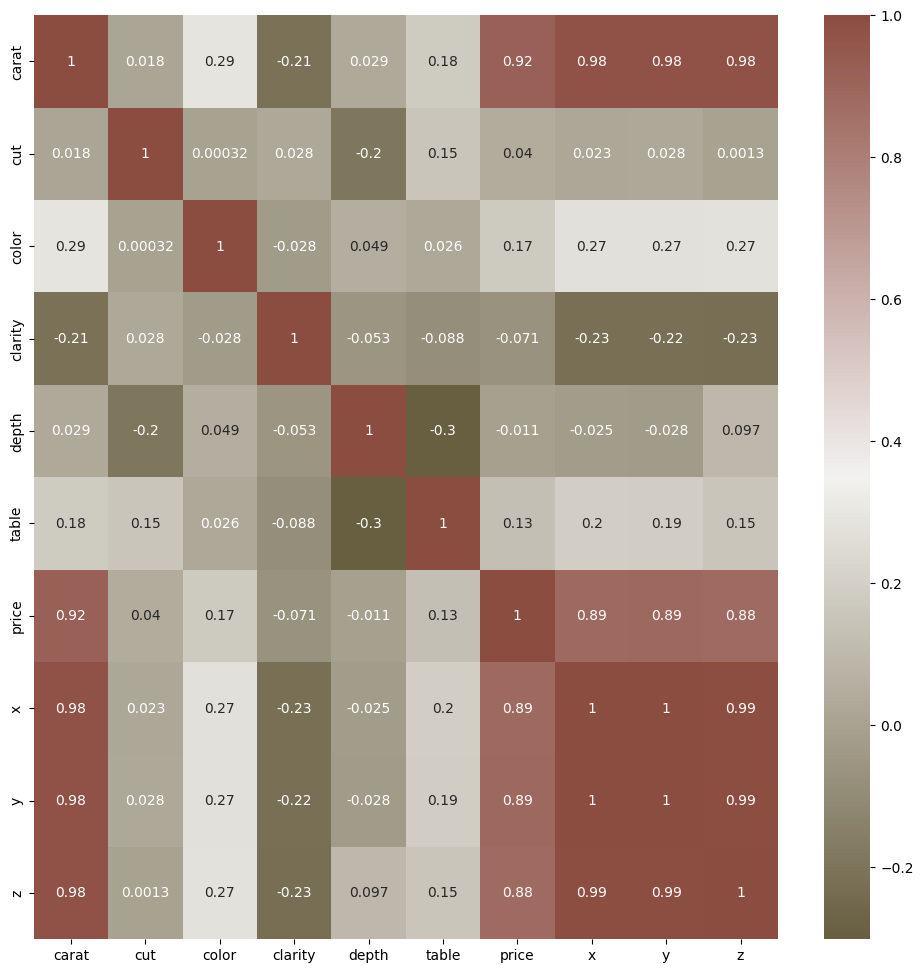

In [28]:
#correlation matrix
cmap = sns.diverging_palette(70,20,s=50, l=40, n=6,as_cmap=True)
corrmat= lb_diamonds.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,cmap=cmap,annot=True, )

In [29]:
#define training values as ds_train and testing values as ds_testing

ds_train= lb_diamonds.drop(["price"],axis =1)
ds_testing= np.log(lb_diamonds["price"])

In [30]:
#splits the data into training and testing sets using scikit-learn's
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(ds_train, ds_testing,test_size=0.25, random_state=7)

### Training the Model (SVR Regressor)

In [31]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(str(model)+ ' --> ' +str(acc))

In [32]:
from sklearn.svm import SVR
SVR = SVR()
model_acc(SVR)

SVR() --> 0.955259692178004


In [33]:
#import SVR model
from sklearn.svm import SVR
from sklearn import metrics

# Create an SVR model with the desired hyperparameters
svr_md = SVR(
    kernel='rbf',
    C=100000,
    degree=1000,
    gamma='scale'
)

# Fit the model on the training data
svr_md.fit(X_train, y_train)

# Use the model to predict on the test data
y_pred = svr_md.predict(X_test)

### Prediction and Evaluate Accuracy

In [34]:
# Model prediction on test data
y_pred = svr_md.predict(X_test)

# Print the R2 score and MAE of the model's predictions
print('R2 score', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error', metrics.mean_absolute_error(y_test, y_pred))

R2 score 0.9704379288552484
Mean Absolute Error 0.13262658739629707


In [35]:
from sklearn import metrics

# Model Evaluation
print("R^2:",metrics.r2_score(y_test, y_pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.9704379288552484
Adjusted R^2: 0.9704181195603111
MAE: 0.13262658739629707
MSE: 0.030528387528695727
RMSE: 0.17472374632171703


In [36]:
pred_value = svr_md.predict([[0.29,3,5,5,62.4,58.0,4.20,4.23,2.63]])
result = np.exp(pred_value)
print(result)

[474.37499305]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


### Final Result Evaluation

In [37]:
# Evaluate the margin of error.
df_py = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred, 'Margin of error': y_test-y_pred})
df_py[0:15]

,Actual Price,Predicted Price,Margin of error
37950,6.914731,6.851609,0.063121
38600,6.945051,7.168917,-0.223866
16557,8.796944,9.056804,-0.259860
20025,6.042633,6.367021,-0.324388
1326,7.992945,8.006319,-0.013375
41270,6.218600,6.258875,-0.040275
53513,7.895808,7.789847,0.105961
24424,9.447545,9.587199,-0.139654
35319,6.799056,6.831705,-0.032649
28285,5.902633,6.183247,-0.280614


In [38]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.13 degrees.
Accuracy: 98.27 %.


<ipython-input-39-29eba7a5d87b>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ds_testing, hist=False, color="r", label="Actual Value")
<ipython-input-39-29eba7a5d87b>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" ,

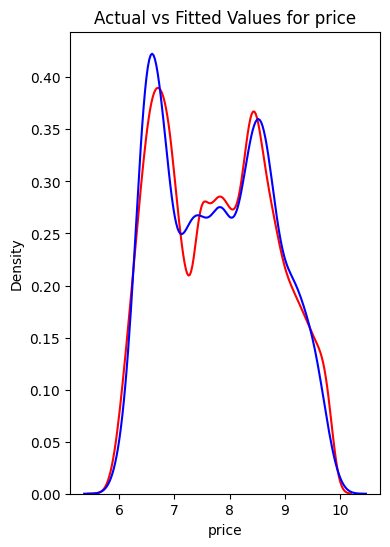

In [39]:
import seaborn as sns
plt.figure(figsize=(4, 6))

ax = sns.distplot(ds_testing, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

plt.title('Actual vs Fitted Values for price')

plt.show()
plt.close()

In [40]:
#export pickle file for use in website
import pickle
with open('SVR_Tuned.pickle', 'wb') as file:
    pickle.dump(svr_md, file)